In [1]:
import numpy as np 
import matplotlib.pyplot as plt

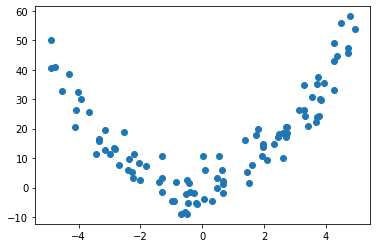

In [5]:
x = np.random.uniform(-5, 5, size=100)
X = x.reshape(-1, 1)
y = (2 * x**2 + x) + np.random.normal(0, 5, size=100)
plt.scatter(x, y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 600)
X_train.shape

(80, 1)

# Learning curve

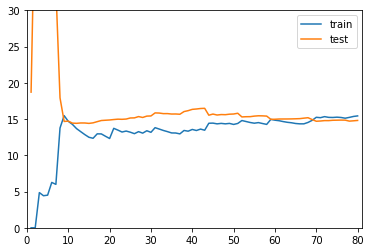

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        y_test_predict = algo.predict(X_test)
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(test_score), label='test')
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 30])
    plt.show()

# Both learning curves stable at a high error region denotes under-fitting
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

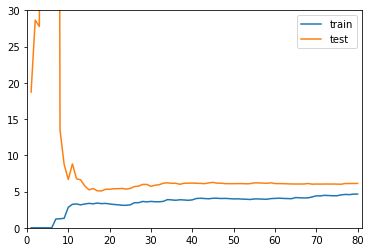

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

# The degree is appropriate when both learning curves stable at a realtively low error region
plot_learning_curve(PolynomialRegression(degree=5), X_train, X_test, y_train, y_test)

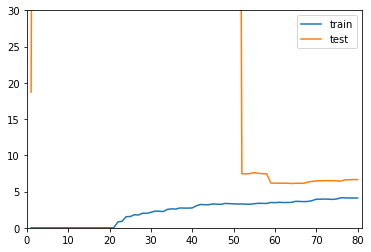

In [37]:
# The test line is far from the train line (test data yield low accuracy) denotes over-fitting
plot_learning_curve(PolynomialRegression(degree=20), X_train, X_test, y_train, y_test)

# Cross Validation

In [39]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

## Compare train_test_split and cross validation
### Unlike using test date to adjust parameters, which may leads the model over-fit the test data. We split train data again into different parts than use these parts to train and adjust parameters. Finally, the test data is only used for score()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 3
Best Score = 0.9930458970792768


In [41]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.98148148, 0.98148148, 0.97222222, 0.99069767, 0.97674419])

In [42]:
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best k =", best_k)
print("Best p =", best_p)
print("Best Score =", best_score)

Best K = 6
Best P = 3
Best Score = 0.9833118001722653


In [44]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=6, p=3)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.9874826147426982

## Recall that grid search also use cross validation

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 12)],
        'p': [i for i in range(1, 6)]
    }
]
grid_serach = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_serach.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=1)]: Done 275 out of 275 | elapsed:   26.8s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=10, p=5,
                                            weights='distance'),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [49]:
grid_serach.best_params_

{'n_neighbors': 6, 'p': 3, 'weights': 'distance'}

In [50]:
grid_serach.best_score_

0.9833118001722653

In [51]:
cross_val_score?